# Función signo

En este ejemplo analizaremos la serie de Fourier de la función signo, restringuida al intervalo $[-\pi,\pi]$, definida por
$$
f(\theta):=\left\{
\begin{matrix}
-1,& \theta \in [-\pi,0]\\
1,& \theta \in [0,\pi]\\
\end{matrix}\right. ,
$$
cuya serie de Fourier es de la forma:
$$
f(\theta)=\sum_{n\rm{\ impar}}\frac{4}{n\pi}\sin(n\theta)=\sum_{k=0}^{\infty}\frac{4}{\pi}\frac{\sin[(2k+1)\theta]}{(2k+1)}.
$$

Definimos el $k$-ésimo término de la serie como 
$$
T_{k}(\theta):=\frac{4}{\pi}\frac{\sin[(2k+1)\theta]}{(2k+1)},
$$
y la serie de Fourier truncada hasta el término $n$-ésimo, es decir, 
$$
S_n(\theta):=\sum_{k=0}^n T_{k}(\theta).
$$

# Con Numpy

Primero graficaremos la función y la serie truncada usando Numpy. Para ello, cargamos los módulos correspondientes y definiremos una función que calcule la suma truncada:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def Sn(n,x):
    Sn = 0
    for k in range(n+1):
        Sn += (4/np.pi)*np.sin((2*k+1)*x)/(2*k+1.)
    return Sn

Para graficar las curvas en el intervalo $[-2\pi,2\pi]$, creamos el arreglo de valores correspondiente:

In [3]:
x = np.linspace(-2*np.pi,2*np.pi,1000)

Con esto podemos graficar la serie truncada hasta un orden dado, por ejemplo, $n=10$:

Text(0,0.5,'$S_n(\\theta)$')

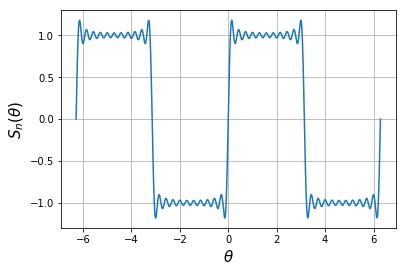

In [4]:
plt.plot(x,Sn(10,x))
plt.grid()
plt.xlabel(r'$\theta$',fontsize=15)
plt.ylabel(r'$S_n(\theta)$',fontsize=15)

Ahora graficamos varias series truncadas

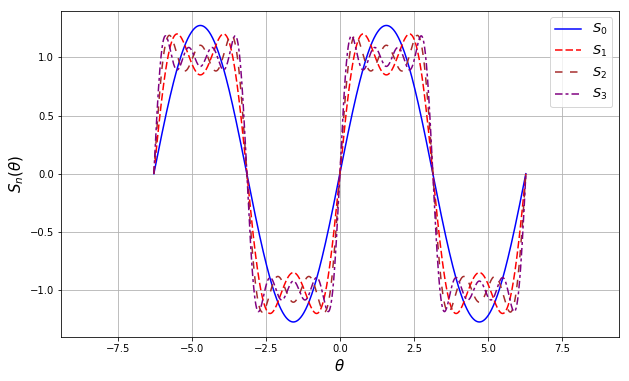

In [5]:
colores = ['blue','red','brown','purple','black']
dasheses = [[],[5,2],[5,5],[5,2,2,2],[2,2]]

fig = plt.figure(figsize=(10,6))
for n in range(4):
    plt.plot(x,Sn(n,x),colores[n], dashes=dasheses[n],label='$S_{%d}$'%n, linewidth=1.5)
plt.xlim(-3*np.pi,3*np.pi)
plt.grid()
plt.xlabel(r'$\theta$',fontsize=15)
plt.ylabel(r'$S_n(\theta)$',fontsize=15)
plt.legend(loc='best',fontsize=13)

También podemos explorar en forma interactiva cómo cambia la serie truncada al variar el número de términos, es decir, variando $n$. Para esto, definimos una función que crea el gráfico para un valor de $n$ dado:

In [6]:
def g(n=0):
    plt.plot(x,Sn(n,x))
    plt.xlim(-np.pi,np.pi)
    plt.grid()
    plt.xlabel(r'$\theta$',fontsize=15)
    plt.ylabel(r'$S_n(\theta)$',fontsize=15)

Ahora desplegamos el gráfico en forma interactiva usando la función `interact` de `ipywidgets`:

In [7]:
from ipywidgets import interact

In [8]:
interact(g,n=(0,50))

interactive(children=(IntSlider(value=0, description='n', max=50), Output()), _dom_classes=('widget-interact',…

<function __main__.g(n=0)>

# Con Sympy

Podemos además analizar este ejemplo usando el paquete de matemática simbólica `Sympy`

In [9]:
import sympy as sp
sp.init_printing()

Primero definimos algunos símbolos que usaremos

In [10]:
x = sp.symbols('x', real=True)
n, m = sp.symbols('n, m', integer=True)

Una forma rápida de intruducir la función que estamos estudiando es usando la función `Heaviside` que está predefinida en `Sympy`

In [11]:
f1 = 2*(sp.Heaviside(x)- sp.Rational(1,2))

`Sympy` tiene su propia función `plot` que permite graficar rápidamente una función definida en forma simbólica:

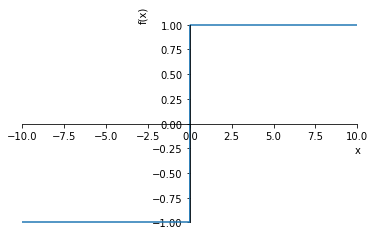

In [12]:
sp.plot(f1)

La serie de Fourier puede ser calculada usando la función `fourier_series`:

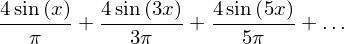

In [13]:
sf = sp.fourier_series(f1,(x,-sp.pi,sp.pi))
sf

Podemos calcular la serie truncada hasta un orden cualquiera con el método `truncate`

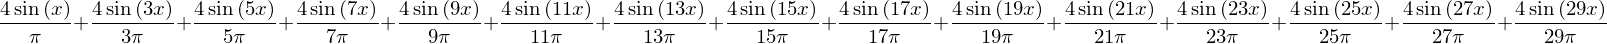

In [14]:
sf.truncate(n=15)

Y graficar en forma interactiva la serie truncada usando la función `plot` de `Sympy`

In [15]:
def g2(m=0):
    sp.plot(sf.truncate(n=m), (x,-2*sp.pi,2*sp.pi))

In [16]:
interact(g2,m=(1,50))

interactive(children=(IntSlider(value=1, description='m', max=50, min=1), Output()), _dom_classes=('widget-int…

<function __main__.g2(m=0)>

Finalmente, podemos calcular los coeficientes $b_n$ a partir de su definición

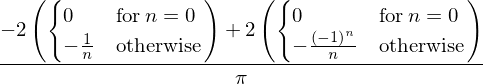

In [17]:
bn = (1/sp.pi)*sp.integrate(f1*sp.sin(n*x),(x,-sp.pi,sp.pi))
bn

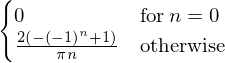

In [18]:
sp.simplify(bn)

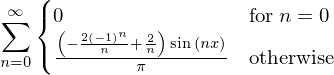

In [19]:
Sm = sp.Sum(bn*sp.sin(n*x),(n,0,sp.oo))
Sm

In [20]:
def g3(m=0):
    sp.plot(sp.Sum(bn*sp.sin(n*x),(n,0,m)).doit(), (x,-2*sp.pi,2*sp.pi))
# Sum().doit() es equivalente a summation()

In [21]:
interact(g3,m=(1,50))

interactive(children=(IntSlider(value=1, description='m', max=50, min=1), Output()), _dom_classes=('widget-int…

<function __main__.g3(m=0)>